# Importations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
titanic = pd.read_csv('titanic-passengers.csv', sep=';')#retrieving data from titanic-passengers.csv in a pandas dataframe 
titanic_copy = titanic.copy()# make a copy

# Prétaitement

# Nettoyage

In [3]:
titanic.head()#display the header of my dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
titanic.isnull().sum()#display the number of missing data in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True )#replace missing values in the Age column with the mean

In [6]:
titanic['Cabin'].fillna(titanic['Cabin'].mode()[0], inplace=True )#replace missing values in the Cabin column with the mode

In [7]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True )#replace missing values in the Embarked column with the mode

In [8]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Transformation

In [9]:
Survivived_dict = { "Yes":1, "No":0}#Replace categorical values Yes and No with numeric values 1 and 0
titanic['Survived'].replace(Survivived_dict, inplace=True)#insert it in the dataframe

In [10]:
sex_dict = { "male":1, "female":0}#Replace categorical values male and female with numeric values 1 and 0
titanic['Sex'].replace(sex_dict, inplace=True)#insert it in the dataframe
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,B96 B98,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,B96 B98,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,B96 B98,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


# Sélection des fonctionnalités

In [11]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

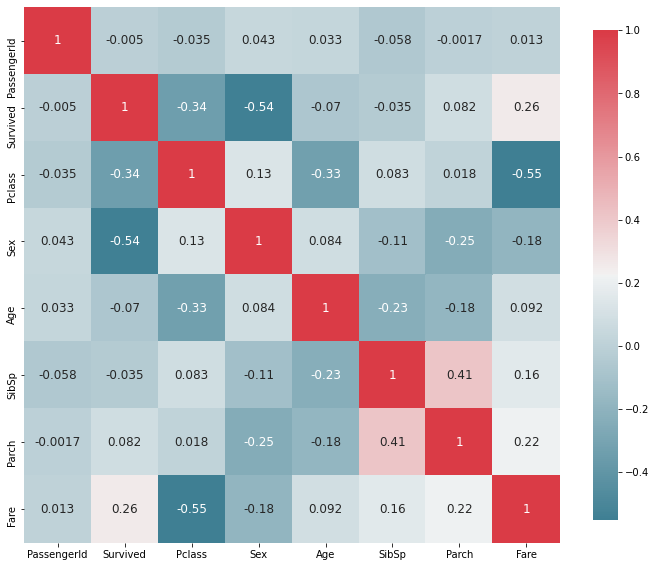

In [12]:
plot_correlation_map( titanic )#display the correlation between my data

Nous remarquons que les colonnes qui ont une meilleur corrélation avec celle de la survie sont l’âge, le sexe, la Pclass, et le tarif qui est lié à la Pclass.Donc nous sélectionnerons les trois colonnes suivantes pour la suite de notre analyse: Age, Sex et Pclass

In [13]:
titanic.drop('PassengerId', axis=1, inplace=True)#drop the PassengerId column

In [14]:
titanic.drop('Name', axis=1, inplace=True)#drop the Name column

In [15]:
titanic.drop('SibSp', axis=1, inplace=True)#drop the SibSp column

In [16]:
titanic.drop('Parch', axis=1, inplace=True)#drop the Parch column

In [17]:
titanic.drop('Ticket', axis=1, inplace=True)#drop the Ticket column

In [18]:
titanic.drop('Fare', axis=1, inplace=True)#drop the Fare column

In [19]:
titanic.drop('Cabin', axis=1, inplace=True)#drop the Cabin column

In [20]:
titanic.drop('Embarked', axis=1, inplace=True)#drop the Embarked column

In [21]:
titanic.head()

,Survived,Pclass,Sex,Age
0,0,2,1,28.0
1,0,3,1,25.0
2,0,3,1,20.0
3,0,3,0,29.0
4,0,1,1,31.0


# Appliquons la régression logistique

In [22]:
#features extraction
x = titanic[['Pclass', 'Sex','Age']]
y = titanic['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)#splitting data with test size of 25%

In [23]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.81


# Utilisons une matrice de confusion pour valider le modèle.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

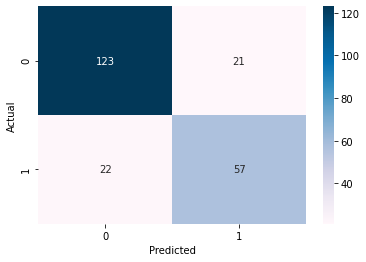

In [24]:
#matrix construction
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='PuBu')

In [25]:
print(classification_report(y_test,y_pred))#classification report

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       144
           1       0.73      0.72      0.73        79

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



#  Une autre matrice de validation pour la classification est ROC / AUC

Une courbe ROC (receiver operating characteristic curve)est un graphique montrant les performances d’un modèle de classification à tous les seuils de classification. Cette courbe représente deux paramètres :

-Taux de vrai positifs TPR, Taux de faux positifs FPR

La courbe ROC est générée en traçant TPR vs FPR

Text(0, 0.5, 'TPR')

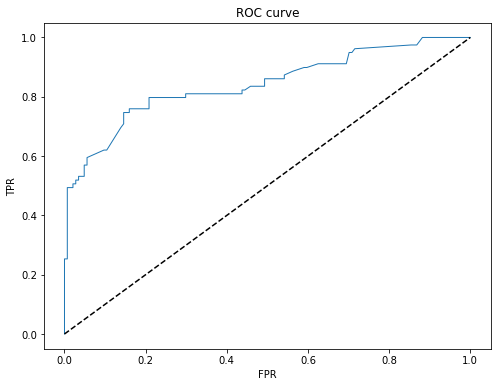

In [28]:
y_pred = logreg.predict_proba(x_test)[:, 1]
FPR, TPR, thresh = roc_curve(y_test, y_pred, pos_label = True)

plt.figure(figsize=(8,6))
plt.plot(FPR, TPR, linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 10
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

AUC signifie « Area under the ROC Curve » (Aire sous la courbe ROC). C’est-à-dire que l’AUC mesure toute la zone bidimensionnelle sous toute la courbe ROC.

La valeur de l’AUC varie de 0 à 1. Un modèle dont les prédictions sont erronées à 100 % a une AUC de 0,0 ; celui dont les prédictions sont correctes à 100% a une AUC de 1,0.

In [30]:
AUC = roc_auc_score(y_test, y_pred)
print("AUC:",AUC)

AUC: 0.8415963431786216
